In [1]:
# import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
# from ydata_profiling import ProfileReport

from scipy.stats import zscore

#import missingno as msno
# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
#import xgboost as xgb
#import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings("ignore")

print('imported.')

imported.


In [2]:
df = pd.read_csv(r"C:\Users\CST Gaming & Editing\Desktop\heart_disease_health_indicators_BRFSS2015.csv")

In [3]:
df.shape

(253680, 22)

In [4]:
print("Duplicates are:",df.duplicated().sum())


Duplicates are: 23899


### Remove duplicates

In [5]:
# Remove duplicates..
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

print("Now Duplicates have removed and we have",df.duplicated().sum(), "duplicate values")

Now Duplicates have removed and we have 0 duplicate values


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229781 entries, 0 to 229780
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  229781 non-null  float64
 1   HighBP                229781 non-null  float64
 2   HighChol              229781 non-null  float64
 3   CholCheck             229781 non-null  float64
 4   BMI                   229781 non-null  float64
 5   Smoker                229781 non-null  float64
 6   Stroke                229781 non-null  float64
 7   Diabetes              229781 non-null  float64
 8   PhysActivity          229781 non-null  float64
 9   Fruits                229781 non-null  float64
 10  Veggies               229781 non-null  float64
 11  HvyAlcoholConsump     229781 non-null  float64
 12  AnyHealthcare         229781 non-null  float64
 13  NoDocbcCost           229781 non-null  float64
 14  GenHlth               229781 non-null  float64
 15  

In [7]:
# Verify the changes
print(df['HeartDiseaseorAttack'].value_counts(normalize=True))

HeartDiseaseorAttack
0.0    0.896784
1.0    0.103216
Name: proportion, dtype: float64


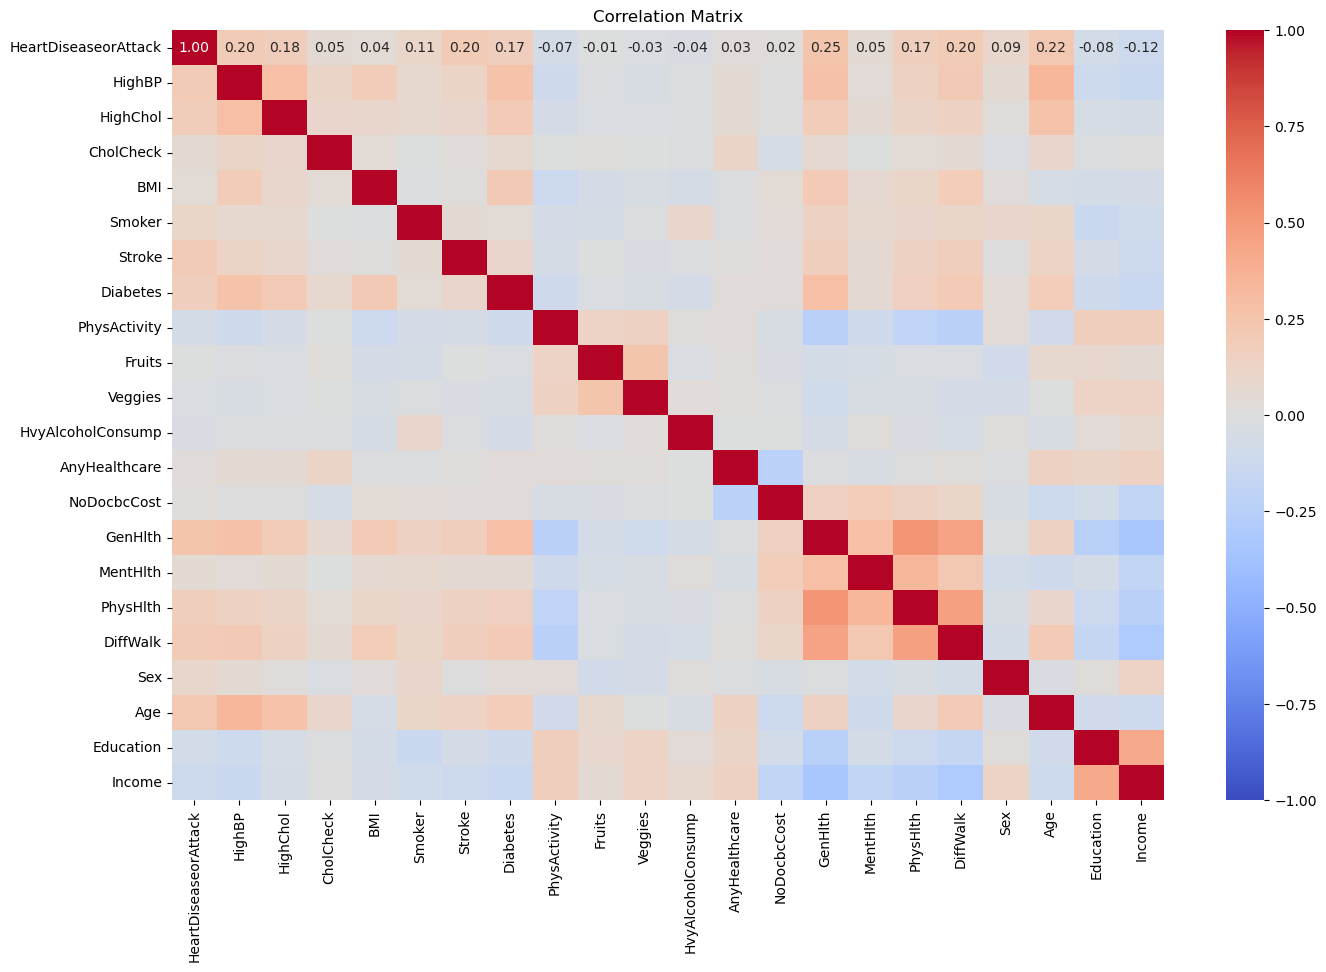

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
# %matplotlib inline
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Check data distribution

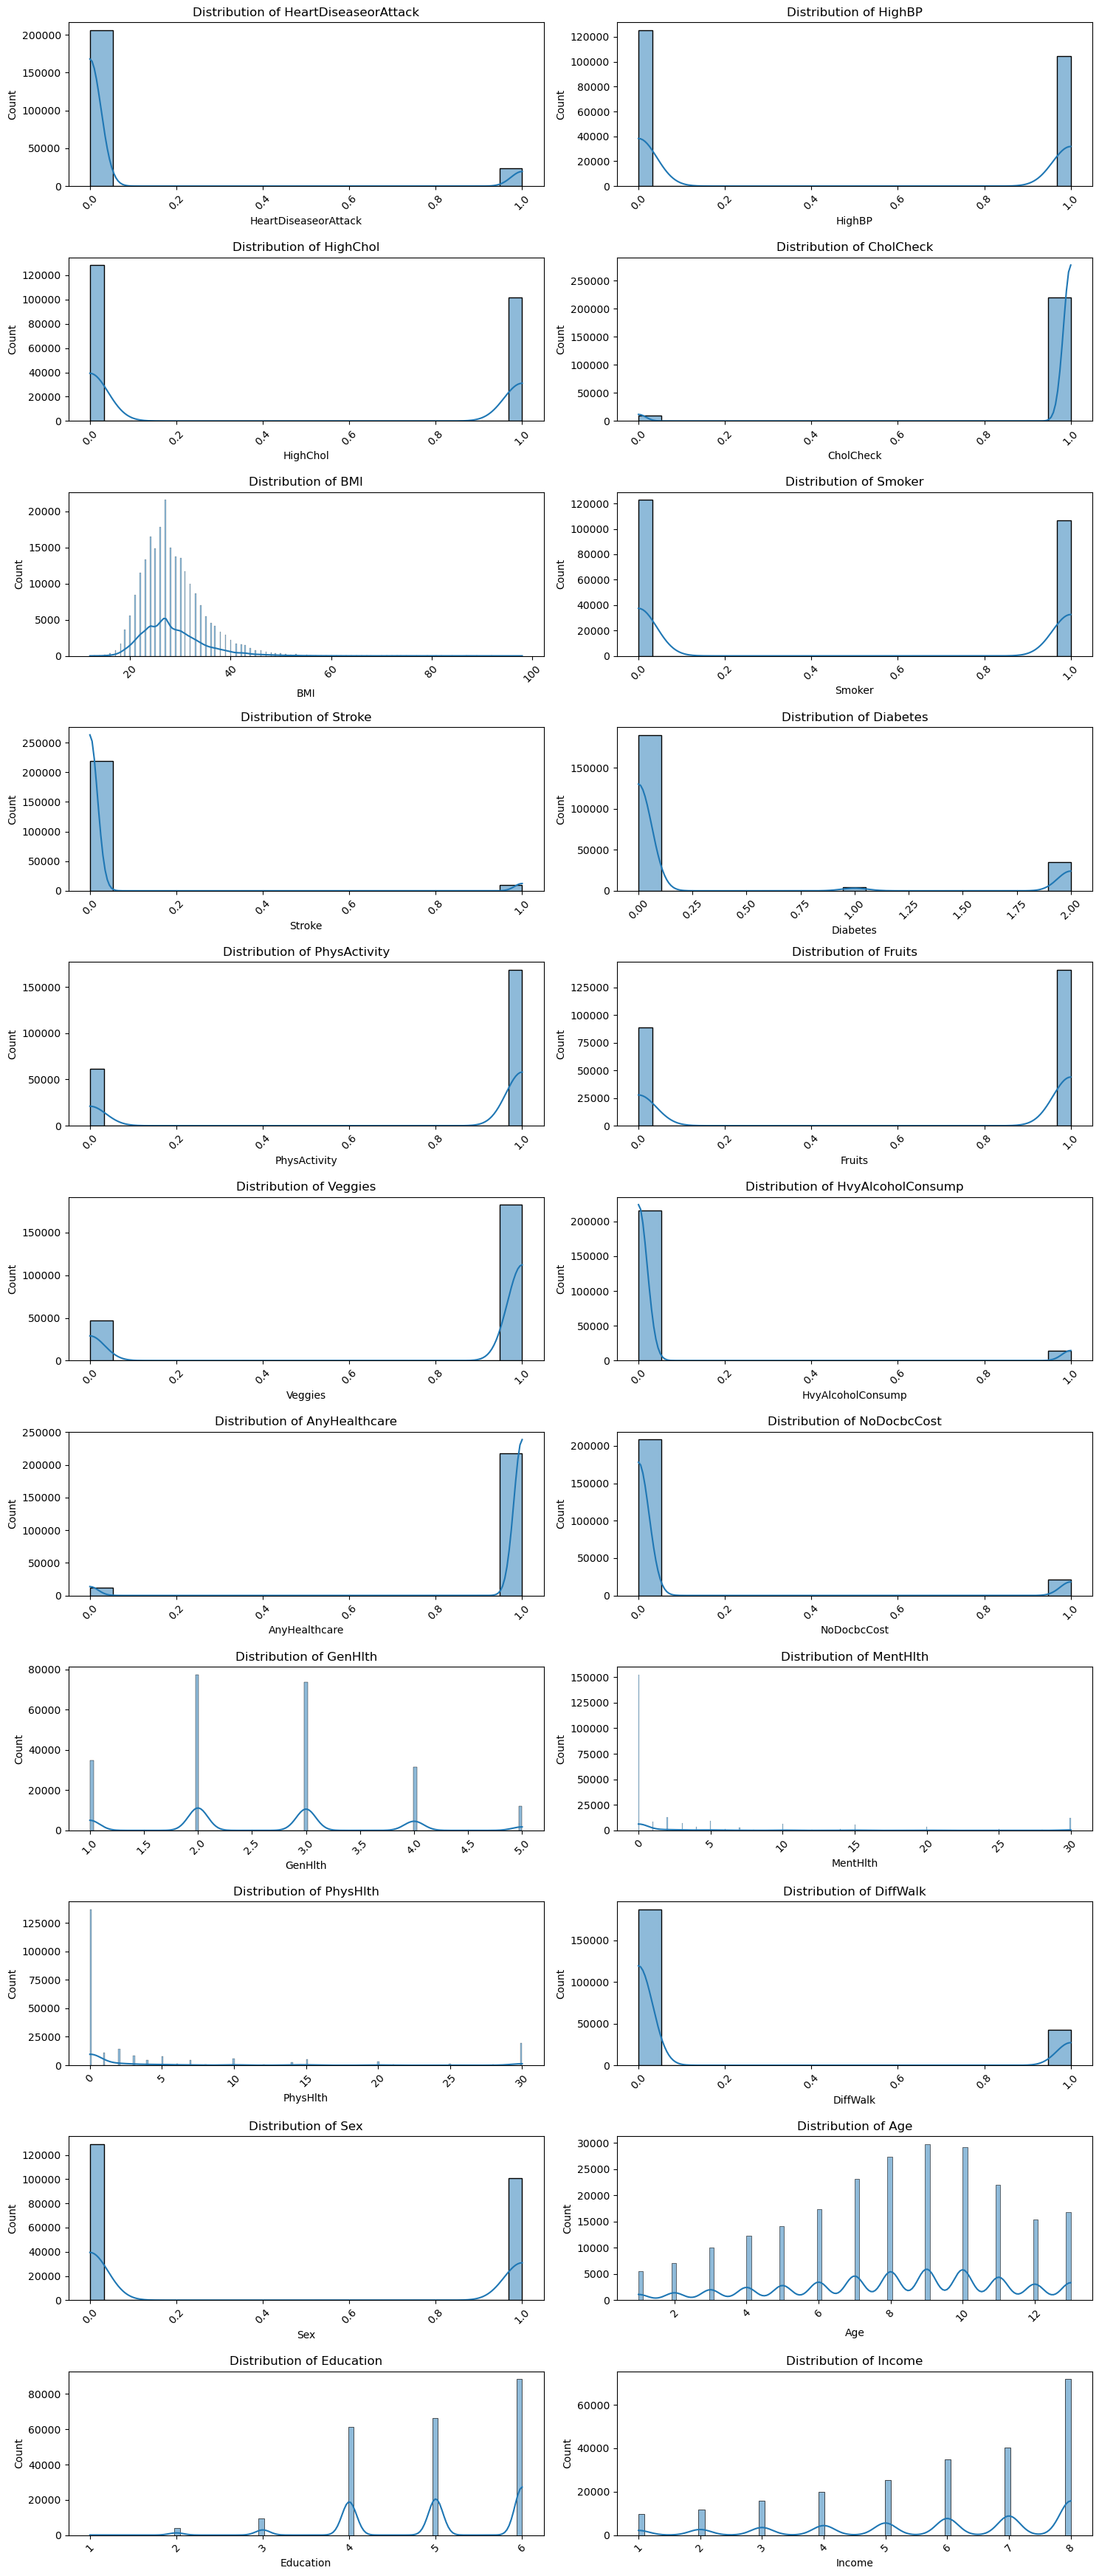

In [9]:
plt.figure(figsize=(15, 35))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(df.columns):
    plt.subplot(11, 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

i. Normalized Distribution (Gaussian)

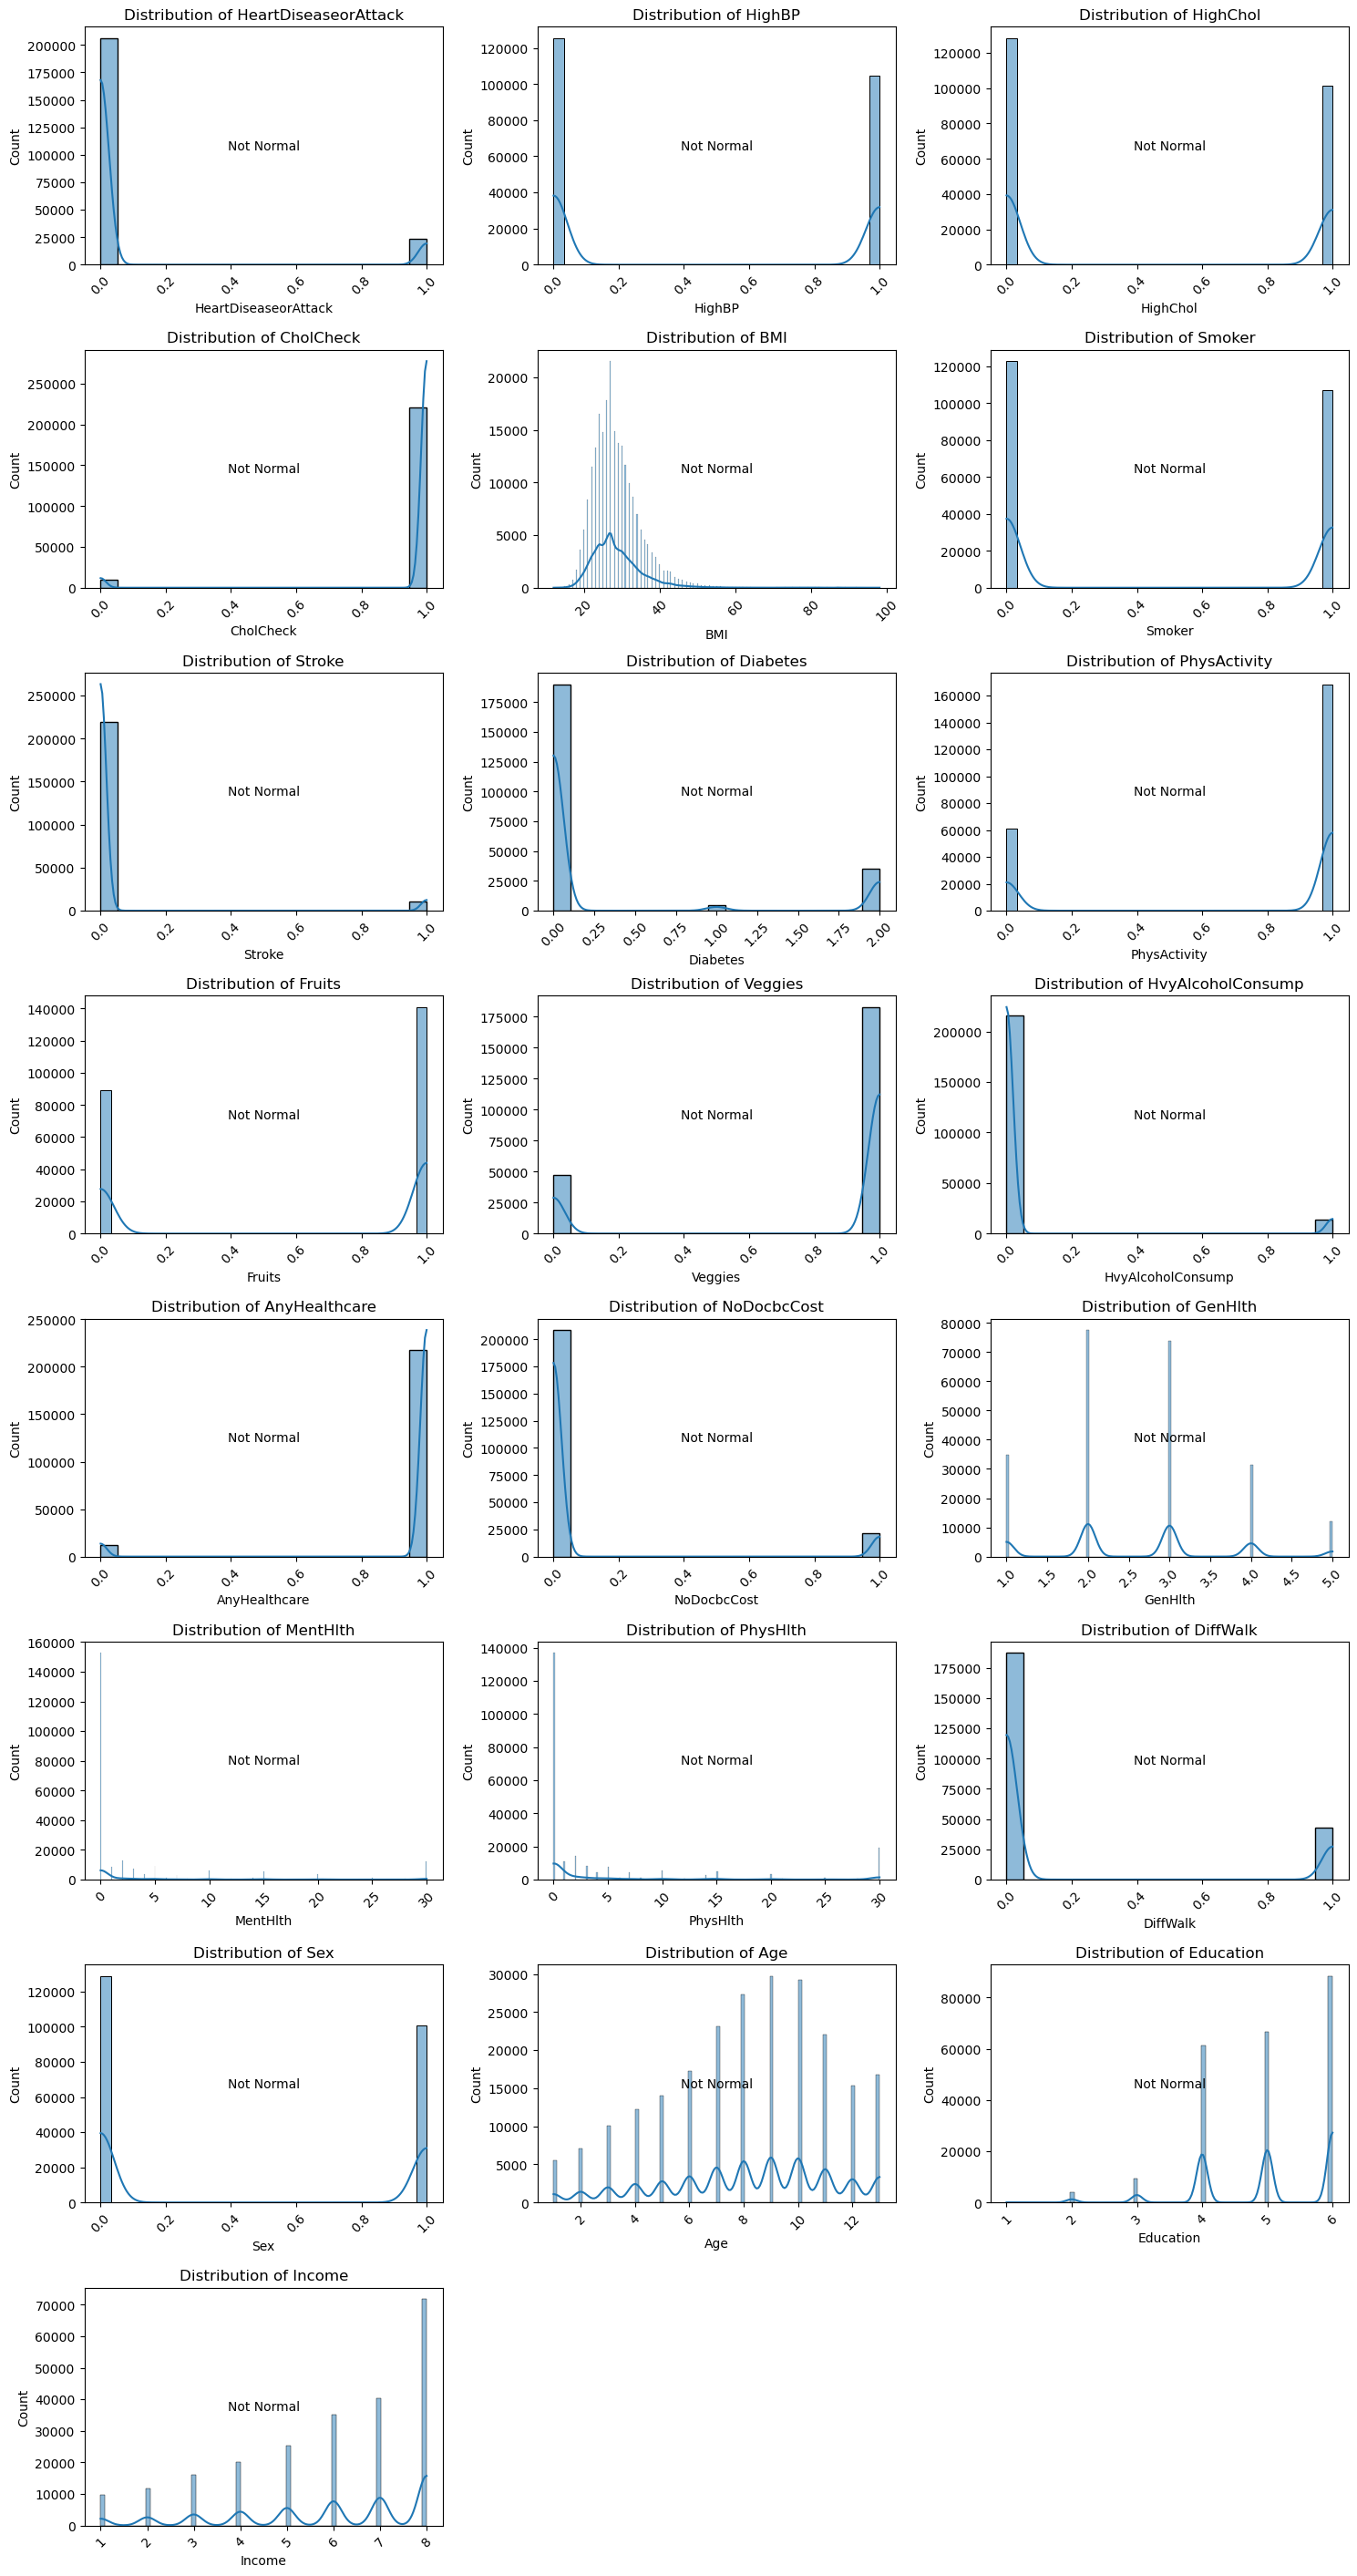

In [10]:
plt.figure(figsize=(15, 35))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df.columns):
    plt.subplot(10, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(df[column])
    # null hyposthesis => The sample is from Normal dsitribution
    if (p < 0.05) | (np.isnan(p)):
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

ii. Skewed Distribution (negative and positive)

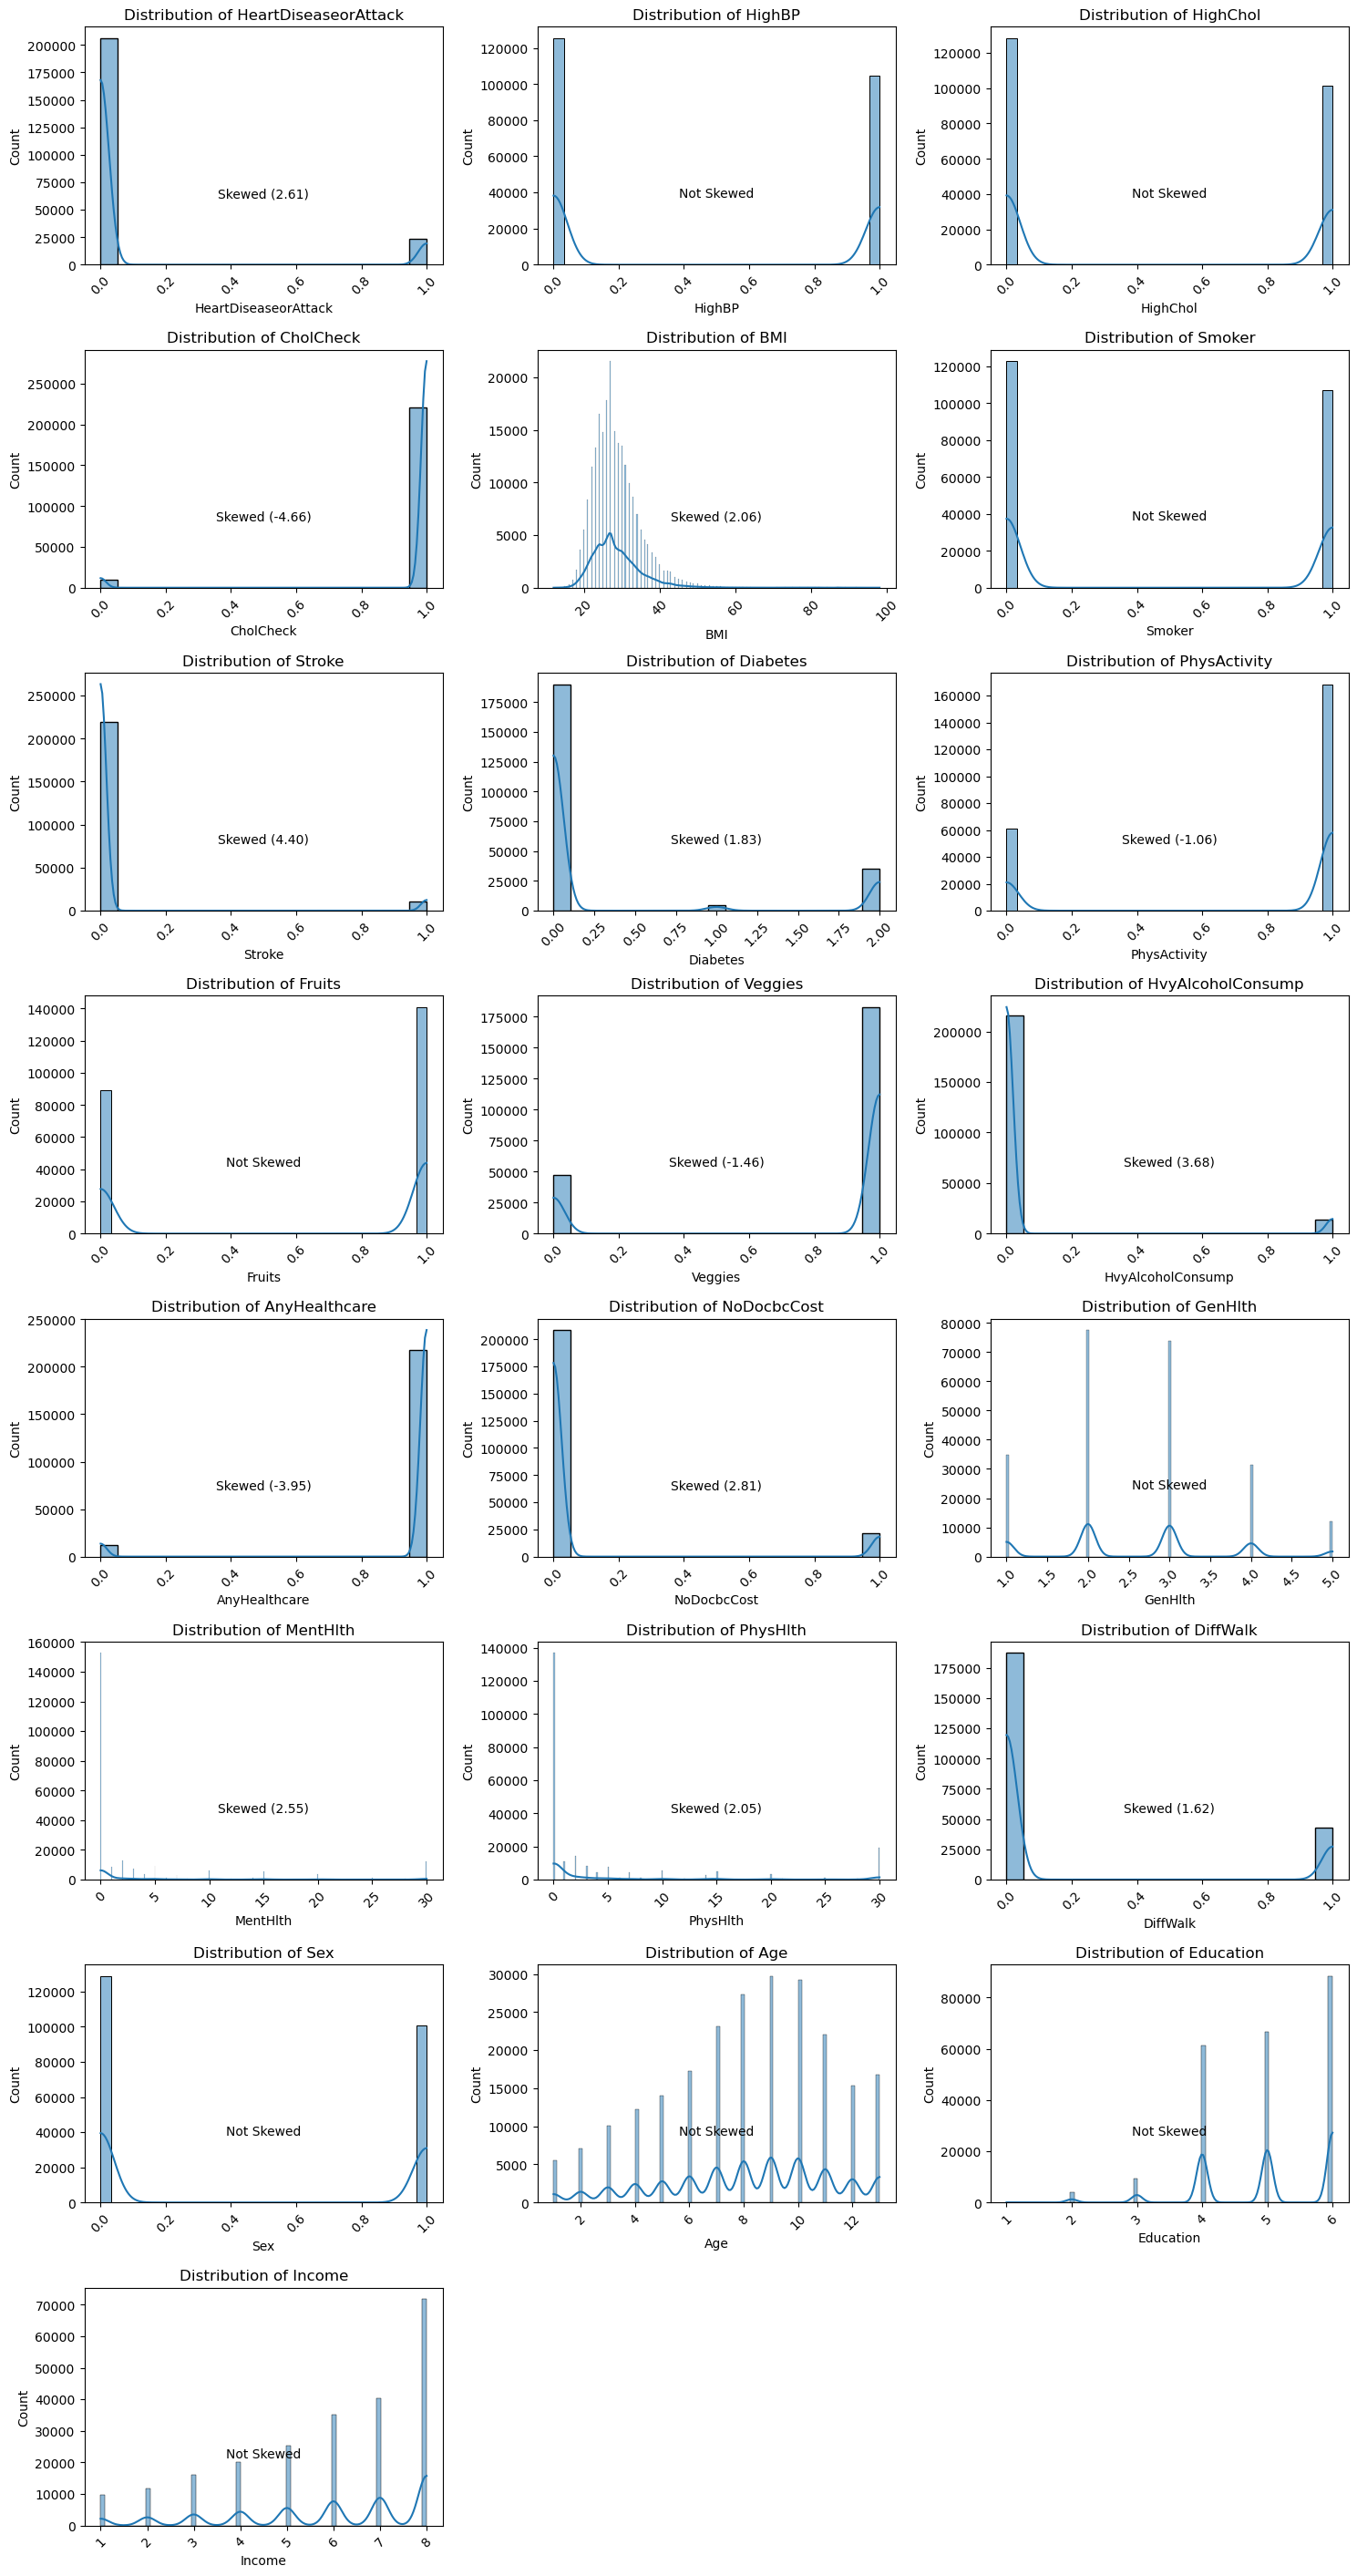

In [11]:
plt.figure(figsize=(15, 35))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df.columns):
    plt.subplot(10, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Check for skewness
    skewness = stats.skew(df[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

###  Checking Outliers

    Outliers Detection and Removal

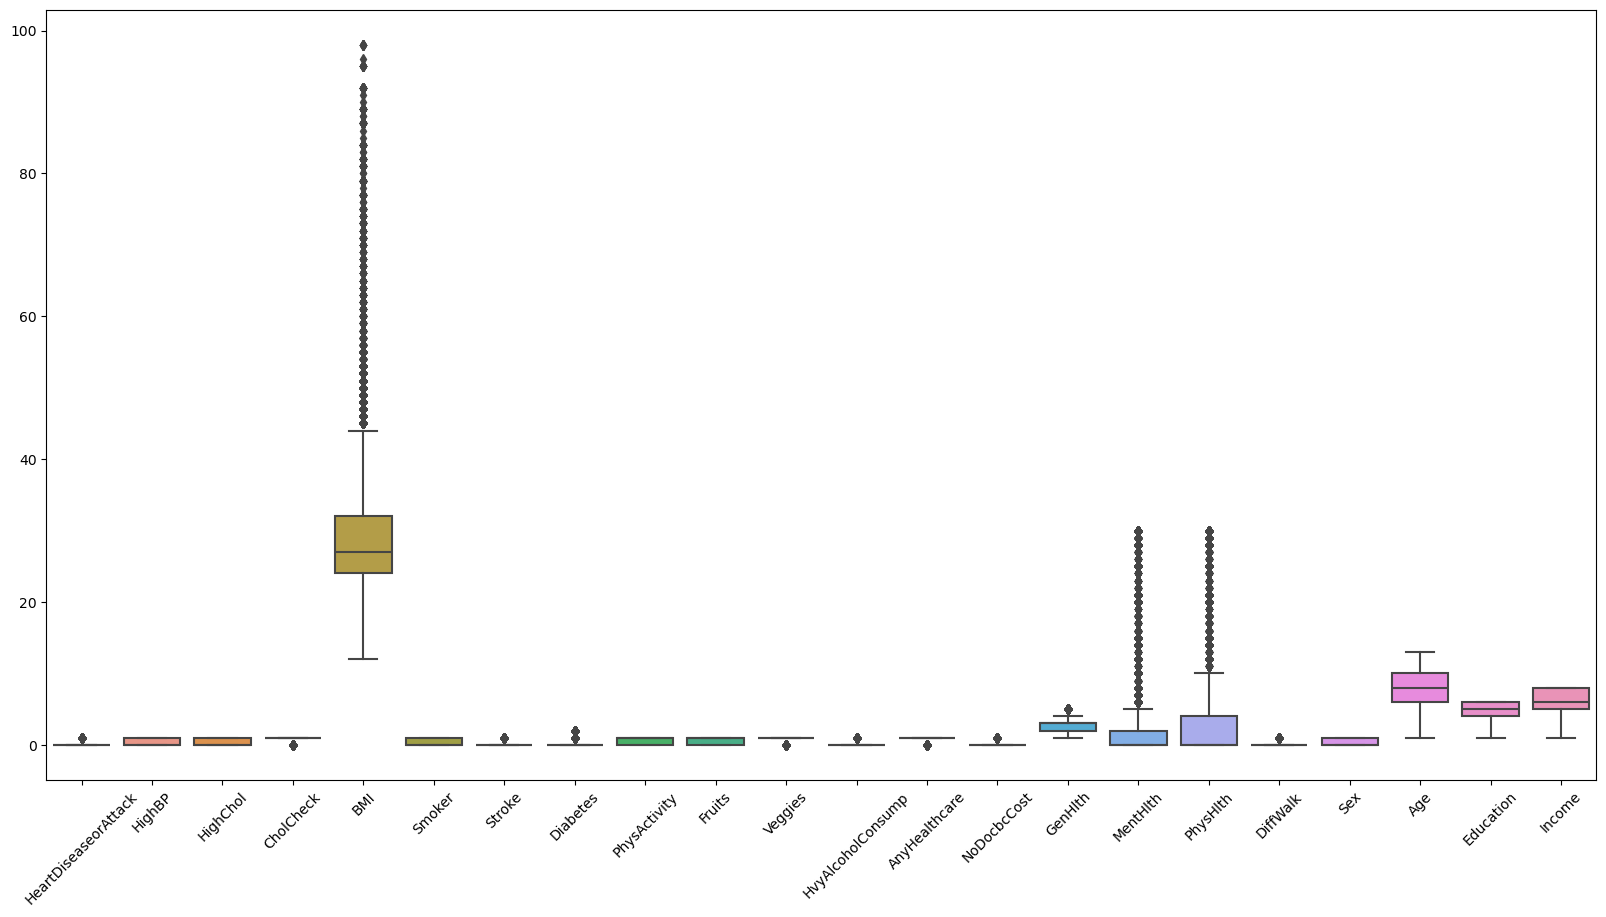

In [12]:
# Plot box plots for each numerical column
plt.figure(figsize=(20, 10))
sns.boxplot(data = df)
plt.xticks(rotation=45)
plt.show()

Z-score

In [13]:
# Function to detect outliers using Z-score for a specific column
def detect_outliers_z_score(data, threshold=2):
    z_scores = (data - data.mean()) / data.std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return outliers

In [14]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(df[df.columns])

# Print indices of rows containing outliers
outlier_indices = df.index[outliers].tolist()

# print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))

Count of outliers: 127854


In [15]:
for i in df.columns:
    # print(i)
    # Detect outliers for each numeric column separately
    outliers = detect_outliers_z_score(df[[i]])
    outlier_indices = df.index[outliers].tolist()
    # print(f"Outliers in column '{column}': {outlier_indices}")
    # data.iloc[outlier_indices]
    # print("Count of outliers for {i}:", len(outlier_indices))
    print(f"Count of outliers for {i}: {len(outlier_indices)}")

Count of outliers for HeartDiseaseorAttack: 23717
Count of outliers for HighBP: 0
Count of outliers for HighChol: 0
Count of outliers for CholCheck: 9298
Count of outliers for BMI: 8380
Count of outliers for Smoker: 0
Count of outliers for Stroke: 10284
Count of outliers for Diabetes: 35097
Count of outliers for PhysActivity: 0
Count of outliers for Fruits: 0
Count of outliers for Veggies: 0
Count of outliers for HvyAlcoholConsump: 13950
Count of outliers for AnyHealthcare: 12391
Count of outliers for NoDocbcCost: 21326
Count of outliers for GenHlth: 12078
Count of outliers for MentHlth: 17616
Count of outliers for PhysHlth: 21755
Count of outliers for DiffWalk: 42626
Count of outliers for Sex: 0
Count of outliers for Age: 5512
Count of outliers for Education: 4214
Count of outliers for Income: 9792


In [16]:
df.shape

(229781, 22)

In [17]:
df["BMI"].describe()

count    229781.00000
mean         28.68567
std           6.78636
min          12.00000
25%          24.00000
50%          27.00000
75%          32.00000
max          98.00000
Name: BMI, dtype: float64

**Remove Outliers based on Z-score**

In [18]:
from scipy.stats import zscore

# Remove outliers based on Z-score for the BMI column
def remove_outliers_z_score_column(df, column_name, threshold = 2):
    z_scores = zscore(df[column_name])
    filtered_data = df[np.abs(z_scores) <= threshold]
    return filtered_data

In [19]:
# Apply the function to remove outliers from the 'BMI' column
df_filtered = remove_outliers_z_score_column(df, 'BMI', threshold=2)

In [20]:
# Reset index of the filtered DataFrame
df_filtered.reset_index(drop=True, inplace=True)

In [21]:
df_filtered['BMI'].describe()

count    221401.000000
mean         27.913438
std           5.170629
min          16.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          42.000000
Name: BMI, dtype: float64

In [22]:
df.shape

(229781, 22)

In [23]:
df_filtered.shape

(221401, 22)

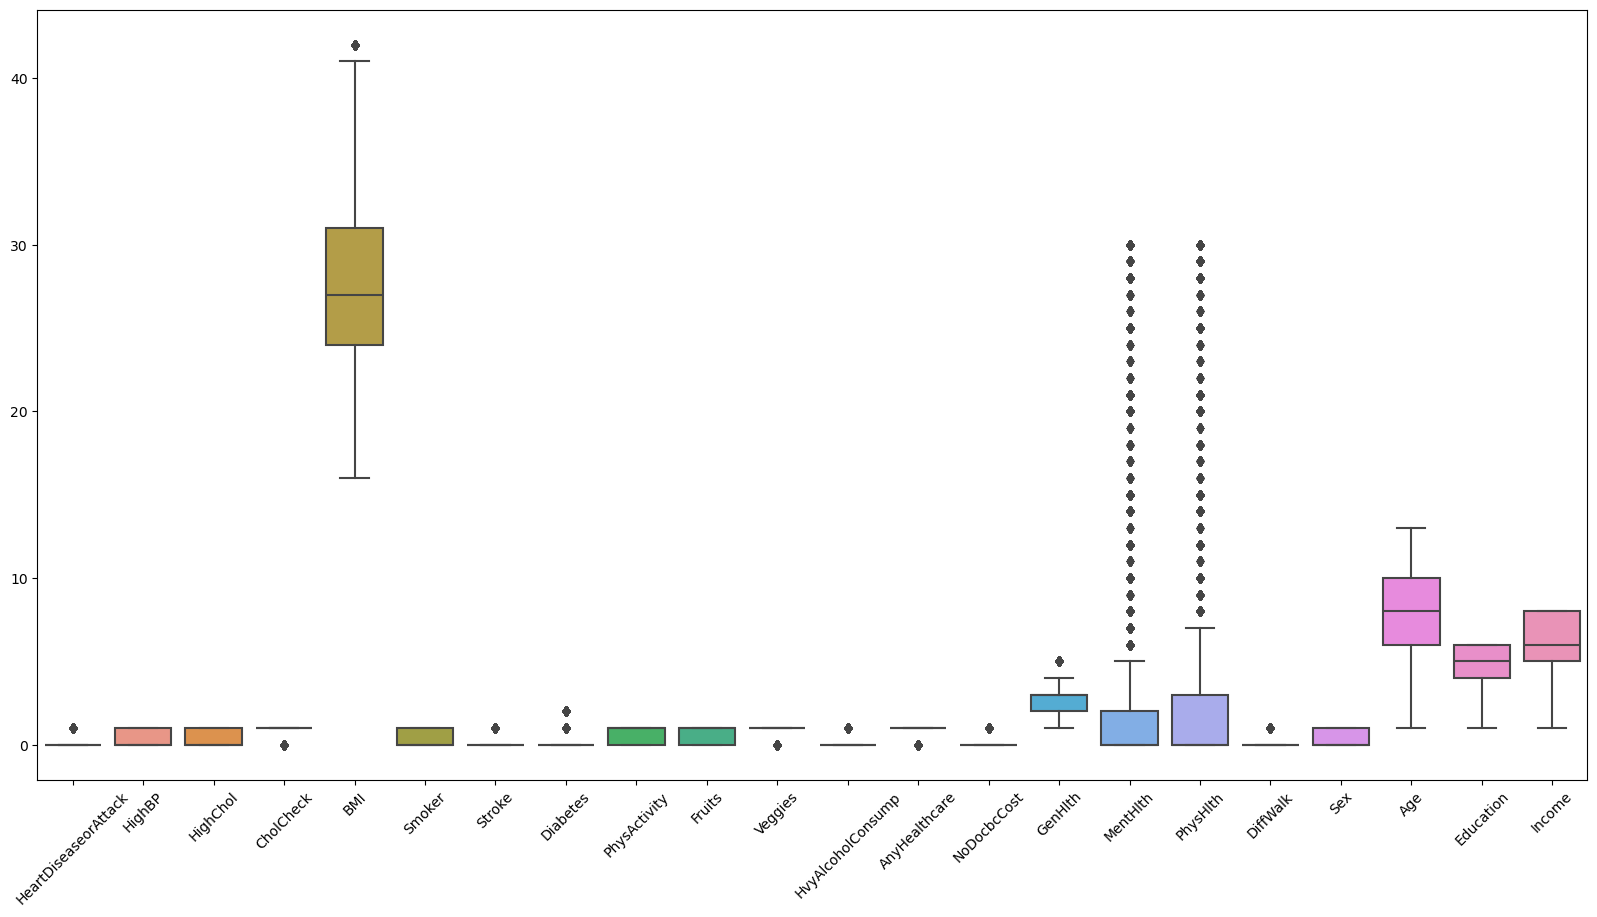

In [24]:
# Plot box plots for each numerical column
plt.figure(figsize=(20, 10))
sns.boxplot(data = df_filtered)
plt.xticks(rotation=45)
plt.show()

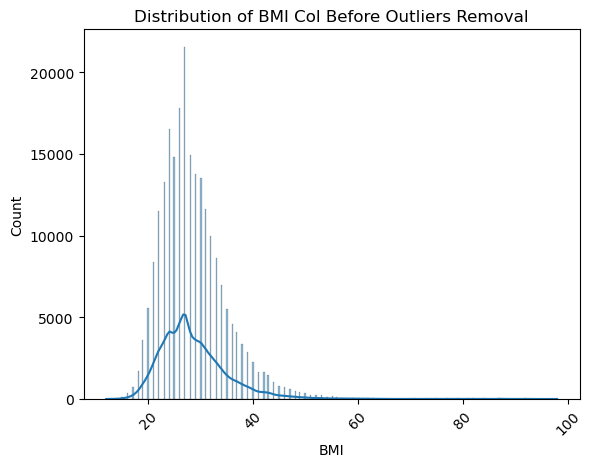

In [25]:
sns.histplot(df["BMI"], kde=True)
plt.title(f'Distribution of BMI Col Before Outliers Removal')
plt.xticks(rotation=45);

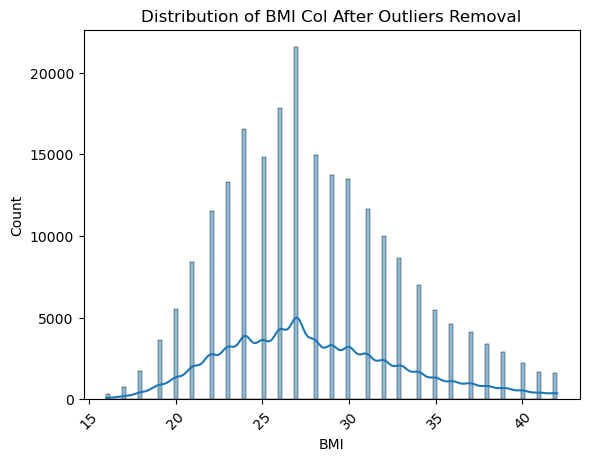

In [26]:
sns.histplot(df_filtered["BMI"], kde=True)
plt.title(f'Distribution of BMI Col After Outliers Removal')
plt.xticks(rotation=45);

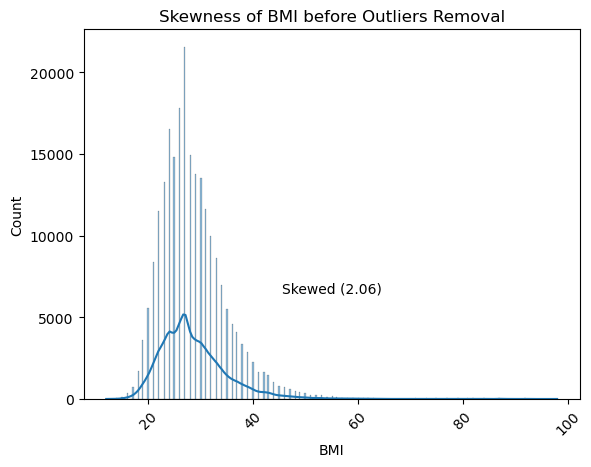

In [27]:
# plt.subplot(10, 3, i+1)
sns.histplot(df["BMI"], kde=True)
plt.title(f'Skewness of BMI before Outliers Removal')
plt.xticks(rotation=45)

# Check for skewness
skewness = stats.skew(df["BMI"])
if skewness < -1 or skewness > 1:
    plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
else:
    plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


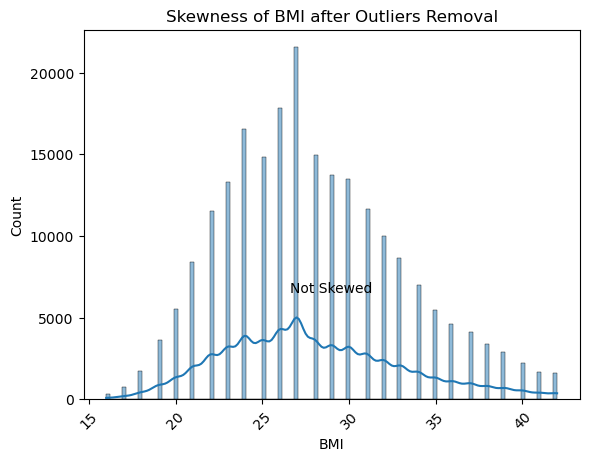

In [28]:
# plt.subplot(10, 3, i+1)
sns.histplot(df_filtered["BMI"], kde=True)
plt.title(f'Skewness of BMI after Outliers Removal')
plt.xticks(rotation=45)

# Check for skewness
skewness = stats.skew(df_filtered["BMI"])
if skewness < -1 or skewness > 1:
    plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
else:
    plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


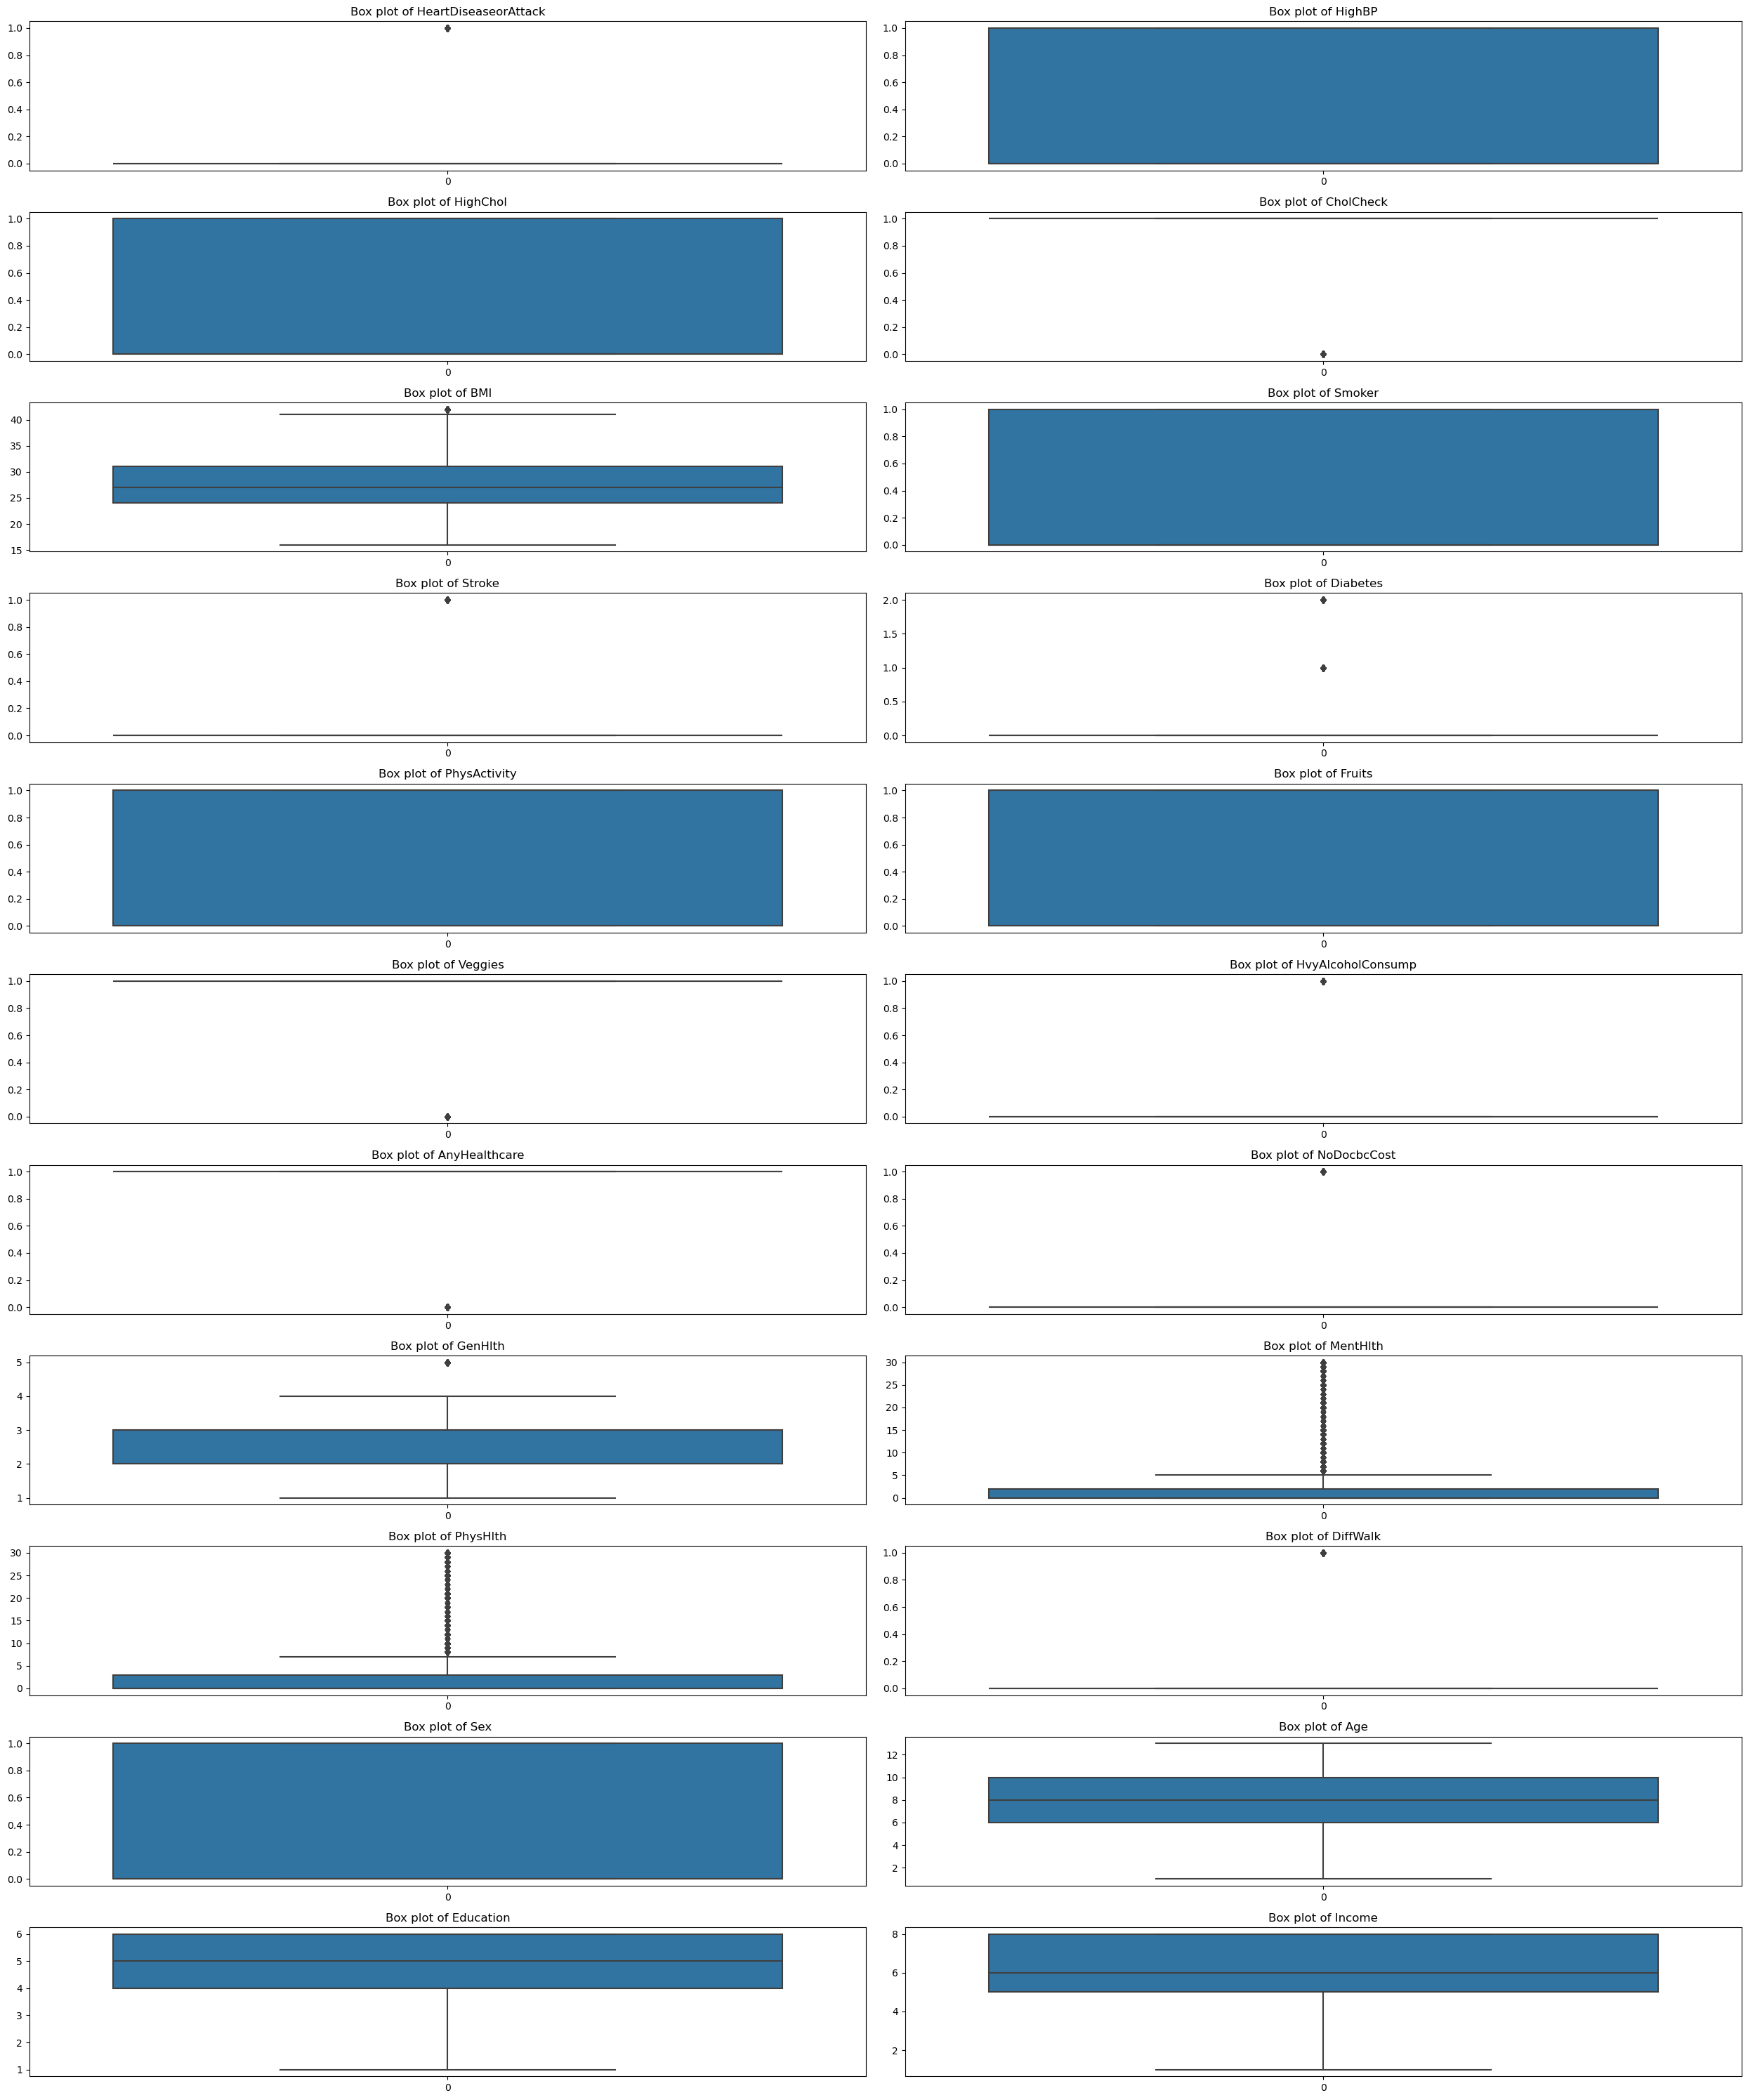

In [29]:
plt.figure(figsize=(25, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(df_filtered.columns):
    plt.subplot(11, 2, i+1)
    sns.boxplot(df_filtered[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [30]:
# plt.figure(figsize=(30,20))
# for i in enumerate(df_filtered.columns):
#   plt.subplot(6, 4, i[0]+1)
#   sns.countplot(x=i[1], hue="HeartDiseaseorAttack", data=df_filtered)

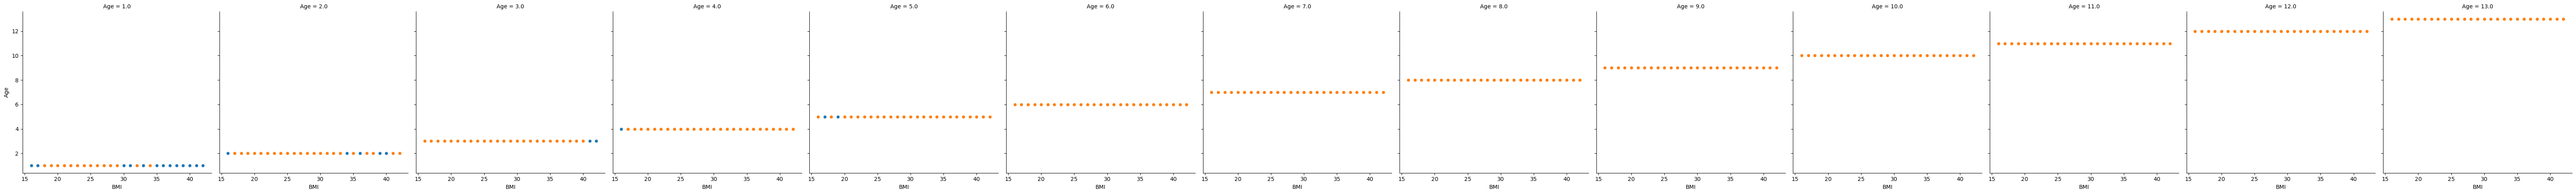

In [31]:
g = sns.FacetGrid(df_filtered, hue="HeartDiseaseorAttack", col="Age", height = 5)
g.map(sns.scatterplot, "BMI", 'Age')
plt.show()

### Machine Learning Algorithms
    - Define X and Y
    - Spliting data into Feature Matrix and Target Vector

**Feature matrix & target vector**

In [32]:
# Feature matrix
X = df_filtered.drop('HeartDiseaseorAttack', axis=1)

# target vector
y = df_filtered['HeartDiseaseorAttack']

In [33]:
X.shape

(221401, 21)

In [34]:
y.shape

(221401,)

### The Sysnthetic Minority Oversampling (SMOTE)

In [35]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
X_os, y_os = os.fit_resample(X, y)

In [36]:
X_os.shape, y_os.shape

((397454, 21), (397454,))

In [37]:
y_os.value_counts(normalize=1)

HeartDiseaseorAttack
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

**Recombine X and y into one dataframe again**

In [38]:
df_os = pd.DataFrame(X_os)
df_os["HeartDiseaseorAttack"] = y_os

In [39]:
df_os.shape

(397454, 22)

In [40]:
# plt.figure(figsize=(30,20))
# for i in enumerate(df_os.columns):
#   plt.subplot(6, 4, i[0]+1)
#   sns.countplot(x=i[1], hue="HeartDiseaseorAttack", data=df_os)

In [41]:
# plt.figure(figsize=(10,7))
# sns.scatterplot(data=df_os, x="BMI", y="Age", hue = "HeartDiseaseorAttack")
# plt.show()

In [42]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.3, random_state=42)

### Feature Scaling 
- using Normalization for feature scaling

- Make sure to use `df_os` dataframe for further below steps

***

In [43]:
df_filtered = df_os

In [44]:
from sklearn.preprocessing import MinMaxScaler
# Target column
target_col = 'HeartDiseaseorAttack'

# Columns to scale (all columns except the target)
columns_to_normalize = df_os.drop(columns=[target_col]).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_filtered[columns_to_normalize] = scaler.fit_transform(df_os[columns_to_normalize])

# Display the resulting DataFrame
df_filtered.shape

(397454, 22)

    - let's check that distribution is now normalized or not?

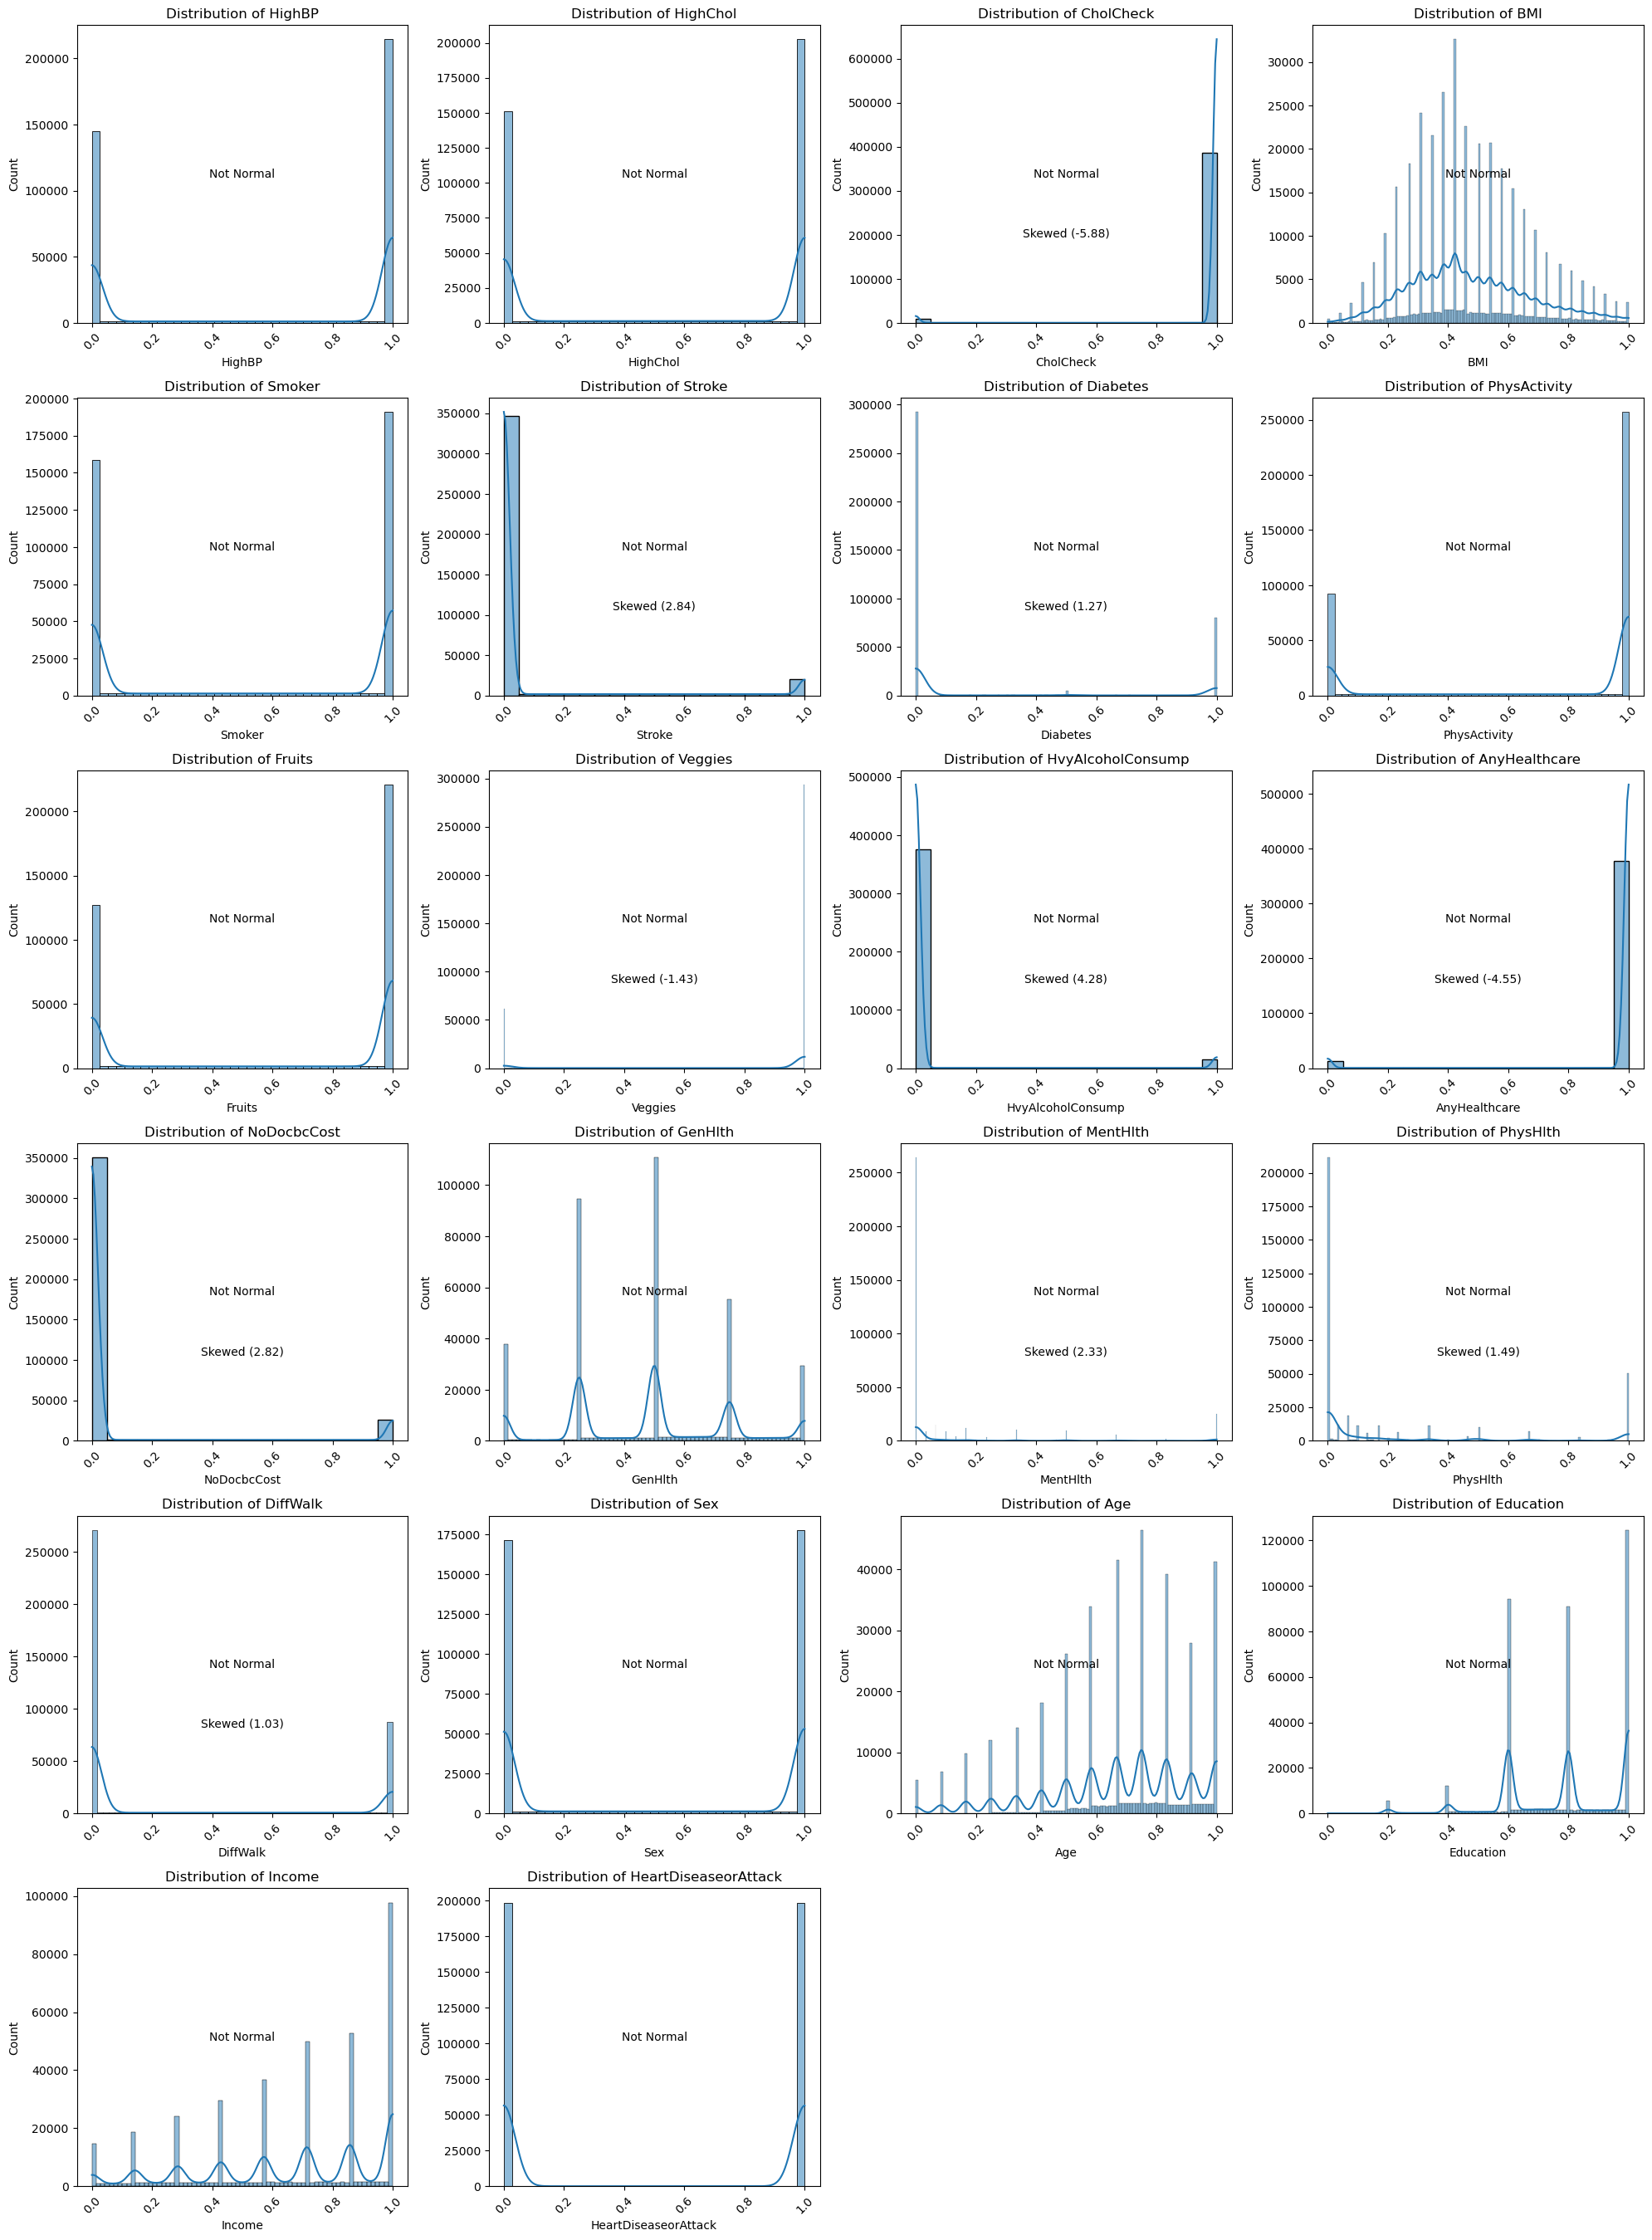

In [45]:
import seaborn as sns
from scipy import stats


numerical_columns = df_filtered.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 40))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_columns):
    plt.subplot(9, 4, i+1)
    sns.histplot(df_filtered[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(df_filtered[column])
    if p < 0.05:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    # Check for uniform distribution
    min_val = df_filtered[column].min()
    max_val = df_filtered[column].max()
    if max_val - min_val < 1e-6:
        plt.text(0.5, 0.4, "Uniform", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    # Check for skewness
    skewness = stats.skew(df_filtered[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

***

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_train_scaled

array([[0.        , 1.        , 1.        , ..., 0.58333333, 1.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.33333333, 0.8       ,
        0.85714286],
       [1.        , 0.10275597, 1.        , ..., 0.67522966, 0.42055119,
        0.586108  ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.41666667, 1.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.5       , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.75      , 0.6       ,
        0.28571429]])

In [48]:
# Converting the scaled data back to DataFrame for easier handling (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the shapes of the resulting datasets
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_scaled shape: (278217, 21)
X_test_scaled shape: (119237, 21)
y_train shape: (278217,)
y_test shape: (119237,)




---



---



---

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

---



---



# Models Building

### KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train_scaled, y_train)

In [ ]:
pred = knn.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(y_test, pred))

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
#Training Accuracy
print(knn.score(X_train_scaled, y_train))

#Testing Accuracy
print(knn.score(X_test_scaled, y_test))

**Check different distance metric**
   - Euclidean
   - Manhattan
   - Chebyshev
   - Minkowski

In [ ]:
# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# List of distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Loop through each distance metric and train the KNN classifier
for metric in distance_metrics:
    # Initialize the KNN classifier with the current metric
    knn = KNeighborsClassifier(n_neighbors=10, metric=metric)

    # Train the classifier
    knn.fit(X_train_scaled, y_train)

    # Make predictions
    pred = knn.predict(X_test_scaled)

    # Print confusion matrix and classification report
    print(f"Distance Metric: {metric}")
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print("Training Accuracy:", knn.score(X_train_scaled, y_train))
    print("Testing Accuracy:", knn.score(X_test_scaled, y_test))
    print()


**Error Rate vs. K Value**

In [ ]:
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

**Accuracy vs. K Value**

In [ ]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_scaled, y_train)
    yhat = neigh.predict(X_test_scaled)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,15),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))

In [ ]:

# Assuming y_test and y_pred_gini are your true labels and predicted labels respectively

# Create a subplot
ax = plt.subplot()

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True, ax=ax, fmt='g')

# Set the title of the plot
ax.set_title('Confusion Matrix', fontsize=20)

# Set tick labels for x-axis (predicted labels)
ax.set_xticklabels(["False","True"], fontsize=12)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')


# Set tick labels for y-axis (true labels)
ax.yaxis.set_ticklabels(["False","True"], fontsize=12)

# Set labels for the axes
ax.set_xlabel('Predicted Labels', fontsize=15)
ax.set_ylabel('True Labels', fontsize=15)

# Show the plot
plt.show()


In [ ]:
# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


***

### II). Decision Tree

In [ ]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_scaled, y_train)

- Use Gini Index

In [ ]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test_scaled)

accuracy_gini = accuracy_score(y_test, y_pred_gini)

accuracy_gini

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate training accuracy
train_accuracy_gini = accuracy_score(y_train, dt_gini.predict(X_train_scaled))

# Calculate testing accuracy
test_accuracy_gini = accuracy_score(y_test, y_pred_gini)

print("Training Accuracy (Decision Tree - Gini): {:.2f}".format(train_accuracy_gini))
print("Testing Accuracy (Decision Tree - Gini): {:.2f}".format(test_accuracy_gini))


In [ ]:
# Calculate accuracy and generate classification report
accuracy_gini = accuracy_score(y_test, y_pred_gini)
dt_gini_classification_rep = classification_report(y_test, y_pred_gini)
# dt_gini_classification_rep

In [ ]:
print(dt_gini_classification_rep)

- Using Entropy

In [ ]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions and evaluating the models
y_pred_entropy = dt_entropy.predict(X_test_scaled)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_entropy

In [ ]:
# generate classification report
dt_entropy_classification_rep = classification_report(y_test, y_pred_entropy)
print(dt_entropy_classification_rep)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_entropy)


In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, ax = ax, fmt = 'g');
ax.set_title('Confusion Matrix', fontsize=20)

# ax.xaxis.set_ticklabels(['Low', 'Moderate','High'], fontsize = 12)
# ax.xaxis.tick_top()

# ax.yaxis.set_ticklabels(['Low', 'Moderate','High'], fontsize = 12)
plt.show()

In [ ]:
# Assuming you have the confusion matrix, classification report, and ROC AUC scores
# for both Gini and Entropy models

# Accuracy Comparison
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
confusion_gini = confusion_matrix(y_test, y_pred_gini)

print("Accuracy Comparison:")
print("Gini Model Accuracy: {:.2f}".format(accuracy_gini))
print("Entropy Model Accuracy: {:.2f}".format(accuracy_entropy))

# Confusion Matrix Comparison
print("\nConfusion Matrix Comparison:")
print("Gini Model Confusion Matrix:\n", confusion_gini)
print("\nEntropy Model Confusion Matrix:\n", confusion_entropy)

# Classification Report Comparison
print("\nClassification Report Comparison:")
print("Gini Model Classification Report:\n", dt_gini_classification_rep)
print("\nEntropy Model Classification Report:\n", dt_entropy_classification_rep)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataset 'df_encoded' and target variable 'y'

# Train a Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Get Feature Importances
importances = dt_model.feature_importances_

# Convert to a DataFrame
feature_importances = pd.DataFrame({'feature': X_train_scaled.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming y_test, y_pred_gini, and y_pred_entropy are already defined from your model predictions

# Evaluation metrics for Gini model
confusion_gini = confusion_matrix(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1_score_gini = f1_score(y_test, y_pred_gini)
roc_auc_gini = roc_auc_score(y_test, y_pred_gini)

# Evaluation metrics for Entropy model
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)

# Printing the evaluation metrics
print("Gini Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_gini)
print("Precision: {:.2f}".format(precision_gini))
print("Recall: {:.2f}".format(recall_gini))
print("F1 Score: {:.2f}".format(f1_score_gini))
print("ROC AUC: {:.2f}".format(roc_auc_gini))

print("\nEntropy Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_entropy)
print("Precision: {:.2f}".format(precision_entropy))
print("Recall: {:.2f}".format(recall_entropy))
print("F1 Score: {:.2f}".format(f1_score_entropy))
print("ROC AUC: {:.2f}".format(roc_auc_entropy))

# ROC curve calculations
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label='Gini - AUC: {:.2f}'.format(roc_auc_gini))
plt.plot(fpr_entropy, tpr_entropy, label='Entropy - AUC: {:.2f}'.format(roc_auc_entropy))
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### III). Logistic Regression Model

In [49]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]


In [50]:
# Evaluate the model
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
class_report_log = classification_report(y_test, y_pred_log)

print("Logistic Regression Confusion Matrix:")
print(conf_matrix_log)
print("\nLogistic Regression Classification Report:")
print(class_report_log)

Logistic Regression Confusion Matrix:
[[44459 15285]
 [11905 47588]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77     59744
         1.0       0.76      0.80      0.78     59493

    accuracy                           0.77    119237
   macro avg       0.77      0.77      0.77    119237
weighted avg       0.77      0.77      0.77    119237



In [51]:
train_accuracy_log = accuracy_score(y_train, log_reg.predict(X_train_scaled))
test_accuracy_log = accuracy_score(y_test, y_pred_log)

print(f"Training Accuracy: {train_accuracy_log:.2f}")
print(f"Testing Accuracy: {test_accuracy_log:.2f}")


Training Accuracy: 0.77
Testing Accuracy: 0.77


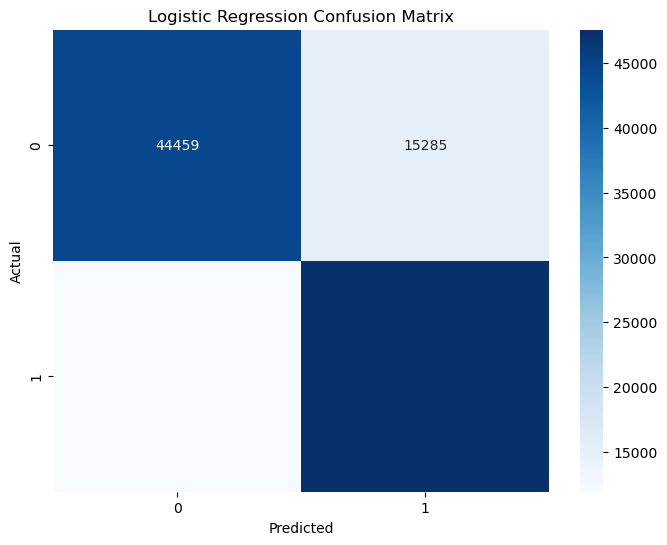

In [52]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

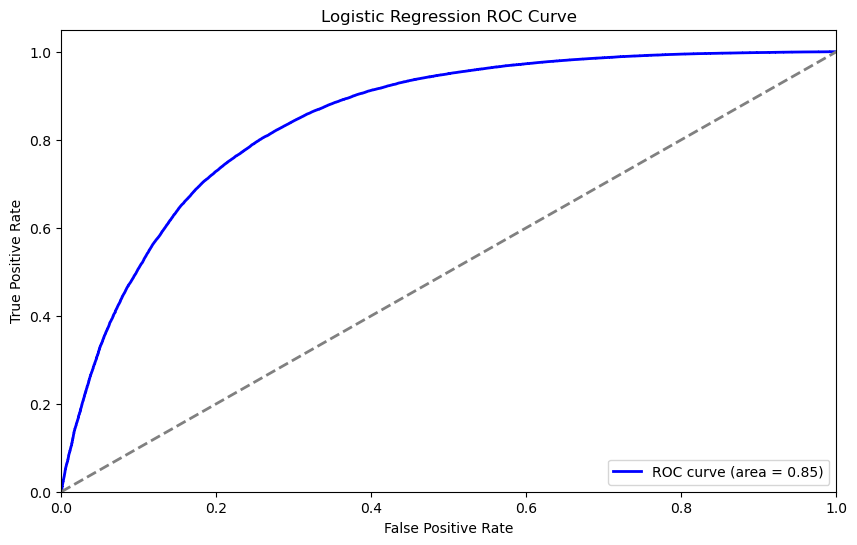

In [53]:
# ROC Curve for Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

### iv. Random Forest

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train_scaled, y_train)


In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# Confusion matrix and classification report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(class_report_rf)


In [ ]:
train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train_scaled))
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Training Accuracy: {train_accuracy_rf:.2f}")
print(f"Testing Accuracy: {test_accuracy_rf:.2f}")


In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


In [ ]:
# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Get Feature Importances
importances = rf_model.feature_importances_

# Convert to a DataFrame
feature_importances = pd.DataFrame({'feature': X_train_scaled.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()


### v. Naive Bayes

In [ ]:
# Initialize the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)


In [ ]:
# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)
y_pred_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Naive Bayes Confusion Matrix:")
print(conf_matrix_nb)

# Classification Report
class_report_nb = classification_report(y_test, y_pred_nb)
print("\nNaive Bayes Classification Report:")
print(class_report_nb)

# Accuracy
train_accuracy_nb = accuracy_score(y_train, nb_model.predict(X_train_scaled))
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Training Accuracy: {train_accuracy_nb:.2f}")
print(f"Testing Accuracy: {test_accuracy_nb:.2f}")


In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


In [ ]:
# ROC Curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()




---



---



---



# Building Stacked Model

### vi. Random Forest + Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Initialize Random Forest and Naive Bayes models
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
nb_model = GaussianNB()


In [ ]:
# Define the stacking model with Random Forest and Naive Bayes as base models
# and Logistic Regression as the meta-classifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', rf_model),
    ('nb', nb_model)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)


In [ ]:
# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)


In [ ]:
# Predict on training data
y_train_pred = stacking_model.predict(X_train_scaled)

# Predict on testing data
y_test_pred = stacking_model.predict(X_test_scaled)

# Predict probabilities for ROC curve
y_test_pred_proba = stacking_model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
def evaluate_model(y_true, y_pred, y_pred_proba=None):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC curve
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
        roc_auc = roc_auc_score(y_true, y_pred_proba)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

# Evaluate the model on training data
print("Training Data Evaluation")
evaluate_model(y_train, y_train_pred)

# Evaluate the model on testing data
print("Testing Data Evaluation")
evaluate_model(y_test, y_test_pred, y_test_pred_proba)


### vii. Random Forest + Decision Tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Initialize Random Forest and Decision Tree models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)


In [ ]:
# Define the stacking model with Random Forest and Decision Tree as base models
# and Logistic Regression as the meta-classifier
estimators = [
    ('rf', rf_model),
    ('dt', dt_model)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)


In [ ]:
# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)


In [ ]:
# Predict on training data
y_train_pred = stacking_model.predict(X_train_scaled)

# Predict on testing data
y_test_pred = stacking_model.predict(X_test_scaled)

# Predict probabilities for ROC curve
y_test_pred_proba = stacking_model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
def evaluate_model(y_true, y_pred, y_pred_proba=None):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # ROC curve
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
        roc_auc = roc_auc_score(y_true, y_pred_proba)
        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

# Evaluate the model on training data
print("Training Data Evaluation")
evaluate_model(y_train, y_train_pred)

# Evaluate the model on testing data
print("Testing Data Evaluation")
evaluate_model(y_test, y_test_pred, y_test_pred_proba)
